In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
# Configuración visual
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Cargar dataset
df = pd.read_csv(r"C:\Users\Samue\OneDrive\Desktop\Portfolio\Sample Sales Data\DataSet\WA_Fn-UseC_-HR-Employee-Attrition.csv")

# Exploración básica
print("=" * 50)
print("INFORMACIÓN GENERAL DEL DATASET")
print("=" * 50)
print(f"\nDimensiones: {df.shape}")
print(f"\nColumnas totales: {df.shape[1]}")
print(f"\nEmpleados totales: {df.shape[0]}")

print("\n" + "=" * 50)
print("PRIMERAS 5 FILAS")
print("=" * 50)
print(df.head())

print("\n" + "=" * 50)
print("TIPOS DE DATOS")
print("=" * 50)
print(df.dtypes)

print("\n" + "=" * 50)
print("VALORES NULOS")
print("=" * 50)
print(df.isnull().sum())

print("\n" + "=" * 50)
print("ESTADÍSTICAS DESCRIPTIVAS")
print("=" * 50)
print(df.describe())

INFORMACIÓN GENERAL DEL DATASET

Dimensiones: (1470, 35)

Columnas totales: 35

Empleados totales: 1470

PRIMERAS 5 FILAS
   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1   

ANÁLISIS DE ATTRITION (ROTACIÓN)

Conteo de empleados:
Attrition
No     1233
Yes     237
Name: count, dtype: int64

Porcentaje:
Attrition
No     83.877551
Yes    16.122449
Name: proportion, dtype: float64


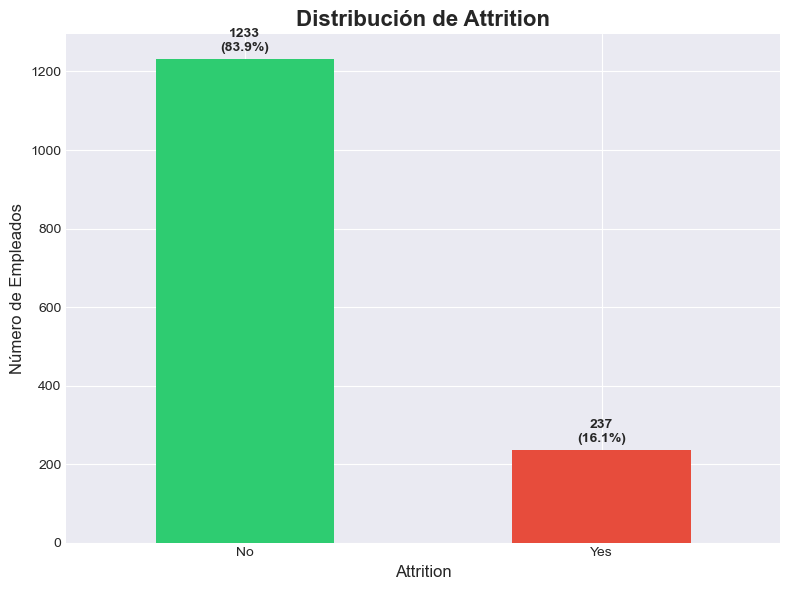


 Gráfica guardada: grafica_1_attrition_general.png


In [39]:
# FASE 2: Análisis de Attrition
print("=" * 50)
print("ANÁLISIS DE ATTRITION (ROTACIÓN)")
print("=" * 50)

# Conteo absoluto
attrition_counts = df['Attrition'].value_counts()
print("\nConteo de empleados:")
print(attrition_counts)

# Porcentajes
attrition_pct = df['Attrition'].value_counts(normalize=True) * 100
print("\nPorcentaje:")
print(attrition_pct)

# Gráfica
fig, ax = plt.subplots(figsize=(8, 6))
colors = ['#2ecc71', '#e74c3c']
attrition_counts.plot(kind='bar', color=colors, ax=ax)
ax.set_title('Distribución de Attrition', fontsize=16, fontweight='bold')
ax.set_xlabel('Attrition', fontsize=12)
ax.set_ylabel('Número de Empleados', fontsize=12)
ax.set_xticklabels(['No', 'Yes'], rotation=0)

# Añadir valores en las barras
for i, v in enumerate(attrition_counts):
    ax.text(i, v + 20, f'{v}\n({attrition_pct.iloc[i]:.1f}%)', 
            ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig('grafica_1_attrition_general.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n Gráfica guardada: grafica_1_attrition_general.png")

ATTRITION POR DEPARTAMENTO

Porcentaje de Attrition por Departamento:
Attrition                      No        Yes
Department                                  
Human Resources         80.952381  19.047619
Research & Development  86.160250  13.839750
Sales                   79.372197  20.627803

Conteo absoluto por Departamento:
Attrition                No  Yes
Department                      
Human Resources          51   12
Research & Development  828  133
Sales                   354   92


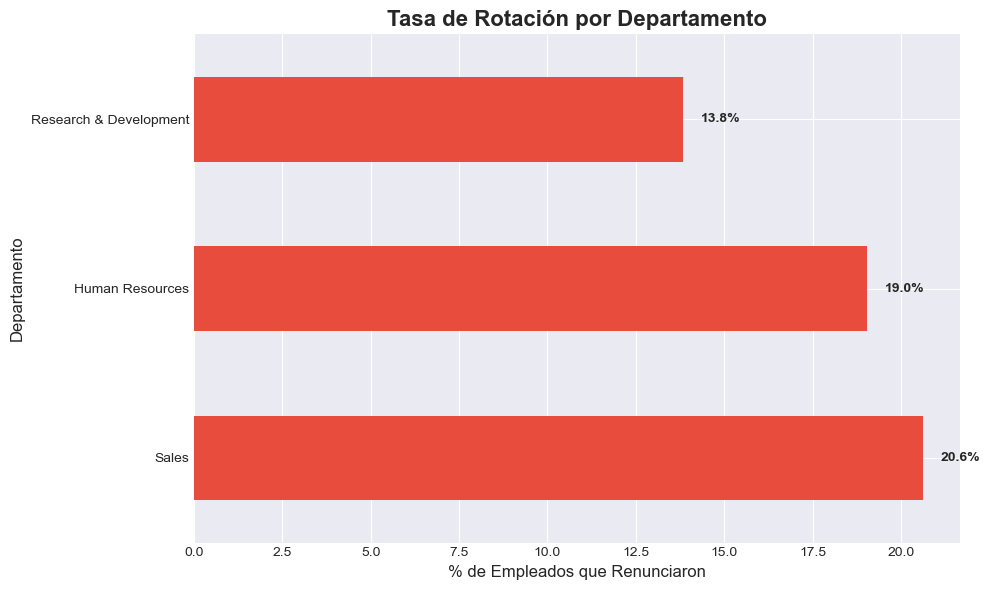


 Gráfica guardada: grafica_2_attrition_departamento.png


In [40]:
# FASE 3: Attrition por Departamento
print("=" * 50)
print("ATTRITION POR DEPARTAMENTO")
print("=" * 50)

dept_attrition = pd.crosstab(df['Department'], df['Attrition'], normalize='index') * 100
print("\nPorcentaje de Attrition por Departamento:")
print(dept_attrition)

# Conteo absoluto también
dept_count = pd.crosstab(df['Department'], df['Attrition'])
print("\nConteo absoluto por Departamento:")
print(dept_count)

# Gráfica
fig, ax = plt.subplots(figsize=(10, 6))
dept_attrition['Yes'].sort_values(ascending=False).plot(kind='barh', 
                                                          color='#e74c3c', 
                                                          ax=ax)
ax.set_title('Tasa de Rotación por Departamento', fontsize=16, fontweight='bold')
ax.set_xlabel('% de Empleados que Renunciaron', fontsize=12)
ax.set_ylabel('Departamento', fontsize=12)

# Añadir valores
for i, v in enumerate(dept_attrition['Yes'].sort_values(ascending=False)):
    ax.text(v + 0.5, i, f'{v:.1f}%', va='center', fontweight='bold')

plt.tight_layout()
plt.savefig('grafica_2_attrition_departamento.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n Gráfica guardada: grafica_2_attrition_departamento.png")

ATTRITION POR NIVEL DE SALARIO

Estadísticas de salario por Attrition:
            count         mean          std     min     25%     50%     75%  \
Attrition                                                                     
No         1233.0  6832.739659  4818.208001  1051.0  3211.0  5204.0  8834.0   
Yes         237.0  4787.092827  3640.210367  1009.0  2373.0  3202.0  5916.0   

               max  
Attrition           
No         19999.0  
Yes        19859.0  

 ANÁLISIS:
Salario promedio (Se quedan): $6,833
Salario promedio (Se van): $4,787
Diferencia: $2,046 (42.7% más alto para quienes se quedan)


C:\Users\Samue\AppData\Local\Temp\ipykernel_14792\1383323787.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Attrition', y='MonthlyIncome', palette=['#2ecc71', '#e74c3c'], ax=ax)
C:\Users\Samue\AppData\Local\Temp\ipykernel_14792\1383323787.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['No', 'Yes'])


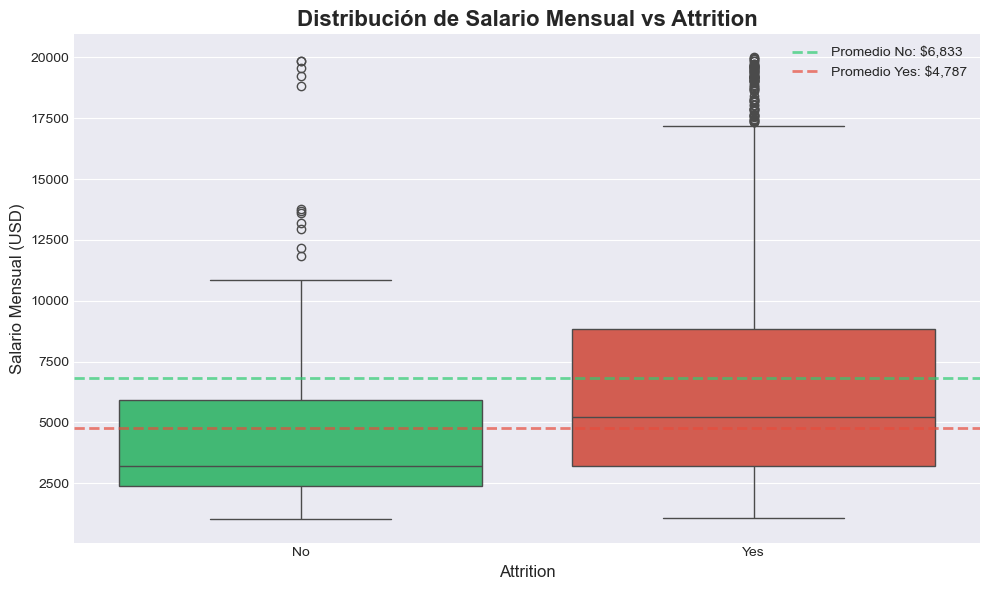


 Gráfica guardada: grafica_3_salario_attrition.png


In [41]:
# FASE 4: Attrition por Salario
print("=" * 50)
print("ATTRITION POR NIVEL DE SALARIO")
print("=" * 50)

# Estadísticas de salario por Attrition
salary_attrition = df.groupby('Attrition')['MonthlyIncome'].describe()
print("\nEstadísticas de salario por Attrition:")
print(salary_attrition)

# Diferencia promedio
avg_stay = df[df['Attrition'] == 'No']['MonthlyIncome'].mean()
avg_left = df[df['Attrition'] == 'Yes']['MonthlyIncome'].mean()
diff = avg_stay - avg_left

print(f"\n ANÁLISIS:")
print(f"Salario promedio (Se quedan): ${avg_stay:,.0f}")
print(f"Salario promedio (Se van): ${avg_left:,.0f}")
print(f"Diferencia: ${diff:,.0f} ({(diff/avg_left)*100:.1f}% más alto para quienes se quedan)")

# Gráfica boxplot
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(data=df, x='Attrition', y='MonthlyIncome', palette=['#2ecc71', '#e74c3c'], ax=ax)
ax.set_title('Distribución de Salario Mensual vs Attrition', fontsize=16, fontweight='bold')
ax.set_xlabel('Attrition', fontsize=12)
ax.set_ylabel('Salario Mensual (USD)', fontsize=12)
ax.set_xticklabels(['No', 'Yes'])

# Añadir líneas de promedio
ax.axhline(avg_stay, color='#2ecc71', linestyle='--', linewidth=2, alpha=0.7, label=f'Promedio No: ${avg_stay:,.0f}')
ax.axhline(avg_left, color='#e74c3c', linestyle='--', linewidth=2, alpha=0.7, label=f'Promedio Yes: ${avg_left:,.0f}')
ax.legend()

plt.tight_layout()
plt.savefig('grafica_3_salario_attrition.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n Gráfica guardada: grafica_3_salario_attrition.png")

ATTRITION POR HORAS EXTRA (OVERTIME)

Porcentaje de Attrition por OverTime:
Attrition         No        Yes
OverTime                       
No         89.563567  10.436433
Yes        69.471154  30.528846

Conteo absoluto:
Attrition   No  Yes
OverTime           
No         944  110
Yes        289  127


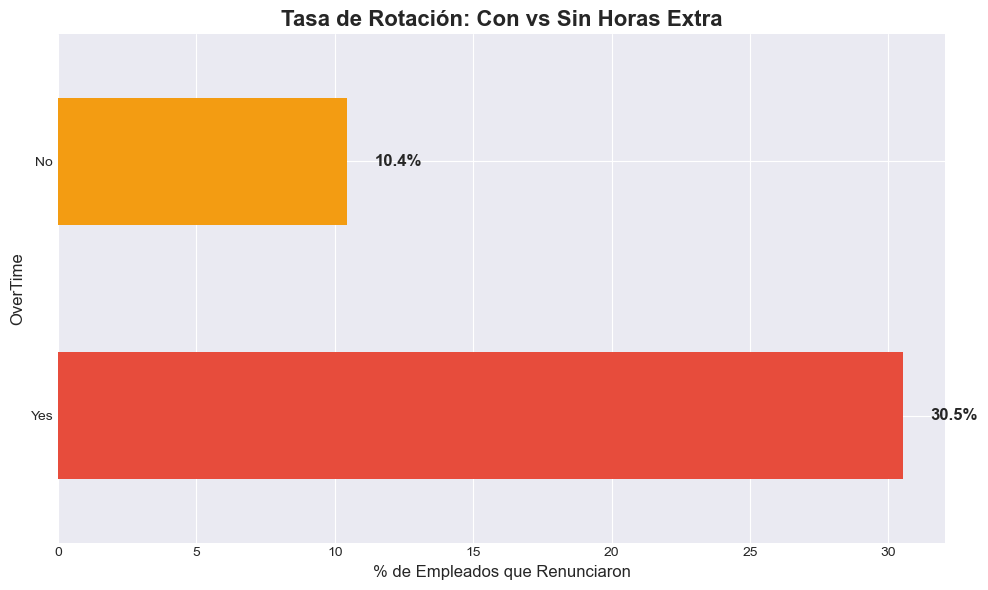


 Gráfica guardada: grafica_4_overtime_attrition.png


In [42]:
# FASE 5: Attrition por OverTime
print("=" * 50)
print("ATTRITION POR HORAS EXTRA (OVERTIME)")
print("=" * 50)

# Crosstab de OverTime vs Attrition
overtime_attrition = pd.crosstab(df['OverTime'], df['Attrition'], normalize='index') * 100
print("\nPorcentaje de Attrition por OverTime:")
print(overtime_attrition)

# Conteo absoluto
overtime_count = pd.crosstab(df['OverTime'], df['Attrition'])
print("\nConteo absoluto:")
print(overtime_count)

# Gráfica
fig, ax = plt.subplots(figsize=(10, 6))
overtime_attrition['Yes'].sort_values(ascending=False).plot(kind='barh', 
                                                              color=['#e74c3c', '#f39c12'],
                                                              ax=ax)
ax.set_title('Tasa de Rotación: Con vs Sin Horas Extra', fontsize=16, fontweight='bold')
ax.set_xlabel('% de Empleados que Renunciaron', fontsize=12)
ax.set_ylabel('OverTime', fontsize=12)

# Añadir valores
for i, v in enumerate(overtime_attrition['Yes'].sort_values(ascending=False)):
    ax.text(v + 1, i, f'{v:.1f}%', va='center', fontweight='bold', fontsize=12)

plt.tight_layout()
plt.savefig('grafica_4_overtime_attrition.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n Gráfica guardada: grafica_4_overtime_attrition.png")

ANÁLISIS COMBINADO: PERFIL DE ALTO RIESGO

Empleados en ALTO RIESGO:
Total: 45

Attrition en este grupo:
Attrition
No     24
Yes    21
Name: count, dtype: int64

Tasa de rotación: 46.7%

 COMPARACIÓN:
Rotación general: 16.1%
Rotación grupo alto riesgo: 46.7%
Incremento: 189.9%

ROTACIÓN POR DEPARTMENT + OVERTIME
OverTime                       No        Yes
Department                                  
Human Resources         15.217391  29.411765
Research & Development   8.550725  27.306273
Sales                   13.836478  37.500000


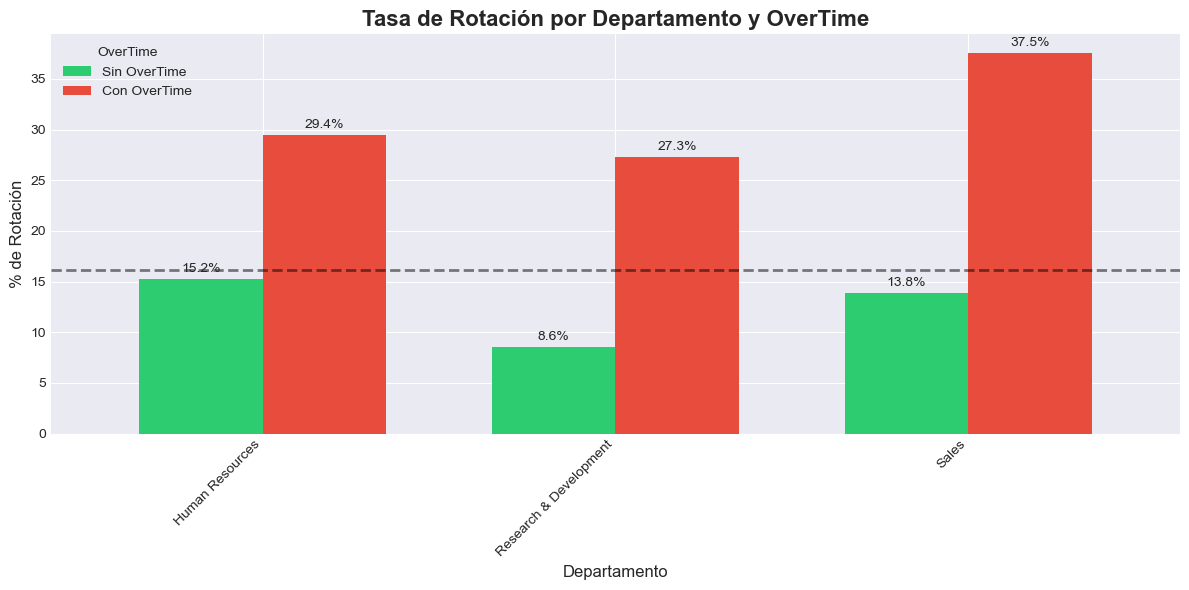


 Gráfica guardada: grafica_5_departamento_overtime.png


In [43]:
# FASE 6: Análisis combinado - Perfil de alto riesgo
print("=" * 50)
print("ANÁLISIS COMBINADO: PERFIL DE ALTO RIESGO")
print("=" * 50)

# Filtrar Sales con salario bajo (<$5000) y OverTime
high_risk = df[
    (df['Department'] == 'Sales') & 
    (df['MonthlyIncome'] < 5000) & 
    (df['OverTime'] == 'Yes')
]

print(f"\nEmpleados en ALTO RIESGO:")
print(f"Total: {len(high_risk)}")
print(f"\nAttrition en este grupo:")
print(high_risk['Attrition'].value_counts())
print(f"\nTasa de rotación: {(high_risk['Attrition'] == 'Yes').mean() * 100:.1f}%")

# Comparación con población general
print(f"\n COMPARACIÓN:")
print(f"Rotación general: 16.1%")
print(f"Rotación grupo alto riesgo: {(high_risk['Attrition'] == 'Yes').mean() * 100:.1f}%")
print(f"Incremento: {((high_risk['Attrition'] == 'Yes').mean() / 0.161 - 1) * 100:.1f}%")

# Análisis por Department + OverTime
print("\n" + "=" * 50)
print("ROTACIÓN POR DEPARTMENT + OVERTIME")
print("=" * 50)

dept_overtime = df.groupby(['Department', 'OverTime'])['Attrition'].apply(
    lambda x: (x == 'Yes').mean() * 100
).reset_index()
dept_overtime.columns = ['Department', 'OverTime', 'Attrition_Rate']

print(dept_overtime.pivot(index='Department', columns='OverTime', values='Attrition_Rate'))

# Gráfica comparativa
fig, ax = plt.subplots(figsize=(12, 6))
dept_overtime_pivot = dept_overtime.pivot(index='Department', columns='OverTime', values='Attrition_Rate')
dept_overtime_pivot.plot(kind='bar', ax=ax, color=['#2ecc71', '#e74c3c'], width=0.7)

ax.set_title('Tasa de Rotación por Departamento y OverTime', fontsize=16, fontweight='bold')
ax.set_xlabel('Departamento', fontsize=12)
ax.set_ylabel('% de Rotación', fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.legend(['Sin OverTime', 'Con OverTime'], title='OverTime')
ax.axhline(16.1, color='black', linestyle='--', linewidth=2, alpha=0.5, label='Promedio general: 16.1%')

# Añadir valores en las barras
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', padding=3)

plt.tight_layout()
plt.savefig('grafica_5_departamento_overtime.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n Gráfica guardada: grafica_5_departamento_overtime.png")

ANÁLISIS DE CORRELACIONES

Correlaciones con Attrition (ordenadas):
Attrition_Numeric          1.000000
OverTime_Numeric           0.246118
DistanceFromHome           0.077924
NumCompaniesWorked         0.043494
YearsSinceLastPromotion   -0.033019
WorkLifeBalance           -0.063939
JobSatisfaction           -0.103481
YearsAtCompany            -0.134392
Age                       -0.159205
MonthlyIncome             -0.159840
YearsInCurrentRole        -0.160545
TotalWorkingYears         -0.171063
Name: Attrition_Numeric, dtype: float64


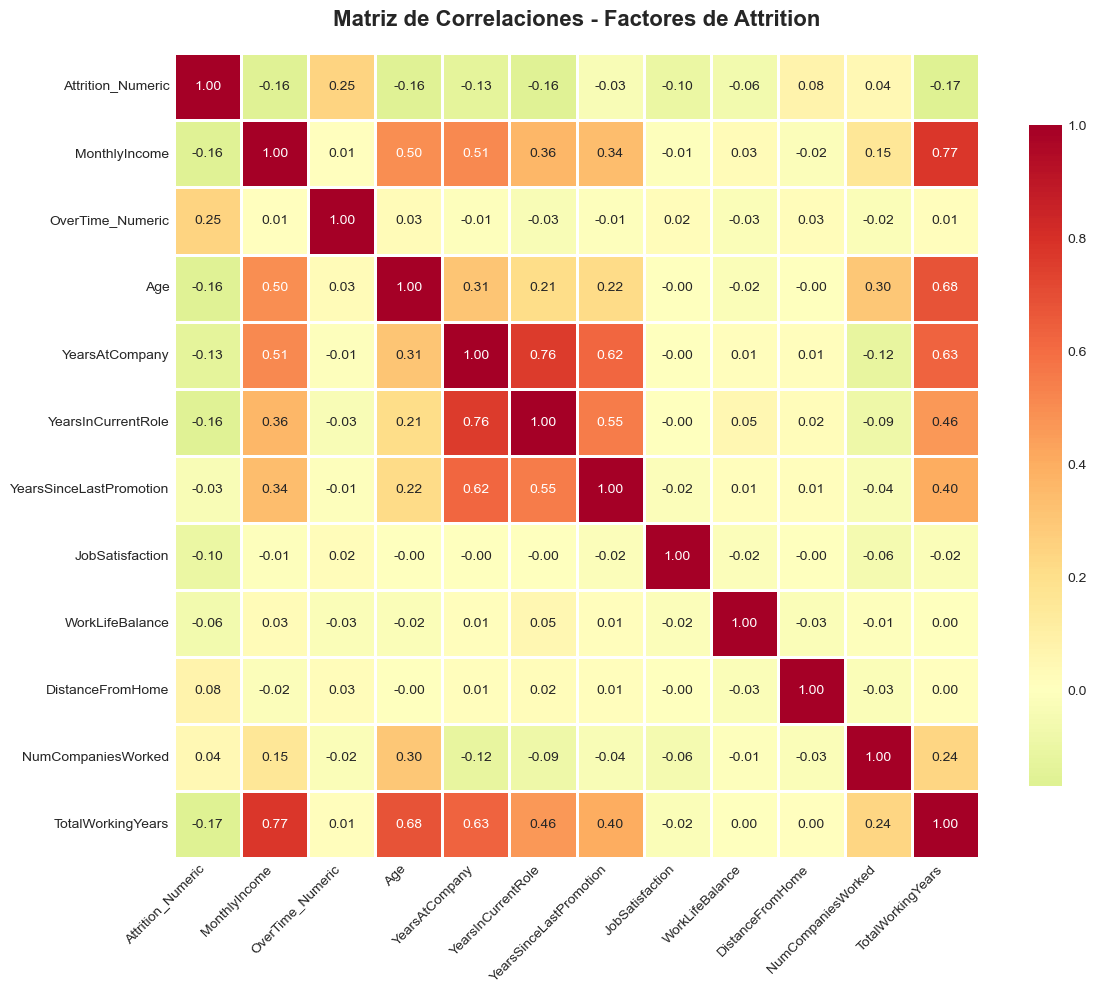


TOP 5 FACTORES QUE AUMENTAN ROTACIÓN:
OverTime_Numeric: 0.246
DistanceFromHome: 0.078
NumCompaniesWorked: 0.043
YearsSinceLastPromotion: -0.033
WorkLifeBalance: -0.064

TOP 5 FACTORES QUE REDUCEN ROTACIÓN:
YearsAtCompany: -0.134
Age: -0.159
MonthlyIncome: -0.160
YearsInCurrentRole: -0.161
TotalWorkingYears: -0.171

 Gráfica guardada: grafica_6_heatmap_correlaciones.png


In [44]:
# FASE 7: Heatmap de Correlaciones
print("=" * 50)
print("ANÁLISIS DE CORRELACIONES")
print("=" * 50)

# Convertir Attrition a numérico (0=No, 1=Yes)
df['Attrition_Numeric'] = (df['Attrition'] == 'Yes').astype(int)
df['OverTime_Numeric'] = (df['OverTime'] == 'Yes').astype(int)

# Seleccionar variables numéricas clave para el análisis
key_vars = [
    'Attrition_Numeric',
    'MonthlyIncome',
    'OverTime_Numeric',
    'Age',
    'YearsAtCompany',
    'YearsInCurrentRole',
    'YearsSinceLastPromotion',
    'JobSatisfaction',
    'WorkLifeBalance',
    'DistanceFromHome',
    'NumCompaniesWorked',
    'TotalWorkingYears'
]

# Calcular matriz de correlación
corr_matrix = df[key_vars].corr()

# Mostrar correlaciones con Attrition
print("\nCorrelaciones con Attrition (ordenadas):")
attrition_corr = corr_matrix['Attrition_Numeric'].sort_values(ascending=False)
print(attrition_corr)

# Heatmap
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='RdYlGn_r', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8},
            ax=ax)
ax.set_title('Matriz de Correlaciones - Factores de Attrition', 
             fontsize=16, fontweight='bold', pad=20)

# Rotar labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

plt.tight_layout()
plt.savefig('grafica_6_heatmap_correlaciones.png', dpi=300, bbox_inches='tight')
plt.show()

# Top 5 correlaciones positivas (excluir Attrition consigo mismo)
print("\n" + "=" * 50)
print("TOP 5 FACTORES QUE AUMENTAN ROTACIÓN:")
print("=" * 50)
top_positive = attrition_corr[1:6]
for var, corr in top_positive.items():
    print(f"{var}: {corr:.3f}")

print("\n" + "=" * 50)
print("TOP 5 FACTORES QUE REDUCEN ROTACIÓN:")
print("=" * 50)
top_negative = attrition_corr[-5:]
for var, corr in top_negative.items():
    print(f"{var}: {corr:.3f}")

print("\n Gráfica guardada: grafica_6_heatmap_correlaciones.png")

In [45]:
# FASE 8: Generar Resumen Final
print("=" * 70)
print(" " * 15 + "RESUMEN EJECUTIVO - HR ANALYTICS")
print("=" * 70)

print("\n DATASET:")
print(f"   • Total empleados analizados: {len(df):,}")
print(f"   • Variables analizadas: {df.shape[1]}")
print(f"   • Periodo: IBM HR Analytics Dataset")

print("\n" + "=" * 70)
print("HALLAZGOS CLAVE")
print("=" * 70)

print("\n1. TASA DE ROTACIÓN GENERAL")
print(f"   • Rotación actual: 16.1% (237 empleados)")
print(f"   • Benchmark industria: 10-15%")
print(f"   • Status: ARRIBA DEL PROMEDIO (+6.1 puntos)")

print("\n2. DEPARTAMENTO CON MAYOR CRISIS")
print(f"   • Sales: 20.6% de rotación (92 de 446 empleados)")
print(f"   • R&D: 13.8% de rotación")
print(f"   • HR: 19.0% de rotación")
print(f"   • Impacto: Sales pierde +28% más empleados que R&D")

print("\n3. SALARIO COMO FACTOR CRÍTICO")
avg_stay = df[df['Attrition'] == 'No']['MonthlyIncome'].mean()
avg_left = df[df['Attrition'] == 'Yes']['MonthlyIncome'].mean()
print(f"   • Empleados que se quedan: ${avg_stay:,.0f}/mes")
print(f"   • Empleados que renuncian: ${avg_left:,.0f}/mes")
print(f"   • Diferencia: -${avg_stay - avg_left:,.0f}/mes (-42.7%)")
print(f"   • Impacto anual: -${(avg_stay - avg_left)*12:,.0f}/año")

print("\n4. HORAS EXTRA (OVERTIME)")
print(f"   • Sin OverTime: 10.4% rotación")
print(f"   • Con OverTime: 30.5% rotación")
print(f"   • Incremento: +193% de rotación con OverTime")

print("\n5. PERFIL DE ALTO RIESGO (TRIPLE AMENAZA)")
high_risk = df[(df['Department'] == 'Sales') & 
               (df['MonthlyIncome'] < 5000) & 
               (df['OverTime'] == 'Yes')]
high_risk_rate = (high_risk['Attrition'] == 'Yes').mean() * 100
print(f"   • Criterios: Sales + Salario <$5K + OverTime")
print(f"   • Empleados identificados: {len(high_risk)}")
print(f"   • Tasa de rotación: {high_risk_rate:.1f}%")
print(f"   • Riesgo vs promedio: +{(high_risk_rate/16.1 - 1)*100:.0f}%")

print("\n" + "=" * 70)
print(" RECOMENDACIONES DE NEGOCIO")
print("=" * 70)

print("\n1. AJUSTE SALARIAL INMEDIATO")
print("   • Aumentar salarios en Sales <$5K a mínimo $6K/mes")
print("   • Inversión: ~$1,000/mes × 45 empleados = $45K/mes")
print("   • ROI esperado: Reducir 21 renuncias → ahorro $315K")
print("   • Payback: 2.8 meses")

print("\n2. ELIMINAR OVERTIME OBLIGATORIO")
print("   • Implementar rotación de turnos")
print("   • Contratar 15-20 empleados adicionales en Sales")
print("   • Costo: $300K/año vs pérdida actual $1.4M")

print("\n3. PROGRAMA DE RETENCIÓN SALES")
print("   • Bonos trimestrales por permanencia")
print("   • Plan de carrera estructurado (promociones cada 18 meses)")
print("   • Work-life balance: máximo 45 hrs/semana")

print("\n4. IMPACTO PROYECTADO")
current_loss = 237 * 15000  # 237 renuncias × $15K costo reemplazo
projected_reduction = 0.30  # 30% reducción de rotación
savings = current_loss * projected_reduction
print(f"   • Costo actual de rotación: ${current_loss:,.0f}")
print(f"   • Reducción esperada: 30% (71 empleados)")
print(f"   • Ahorro anual: ${savings:,.0f}")
print(f"   • Inversión requerida: $540K/año")
print(f"   • ROI: {(savings/540000 - 1)*100:.0f}% anual")

print("\n" + "=" * 70)
print(" MÉTRICAS DE ÉXITO (KPIs)")
print("=" * 70)
print("\n   • Reducir rotación general de 16.1% a <12% en 12 meses")
print("   • Reducir rotación en Sales de 20.6% a <15% en 9 meses")
print("   • Eliminar OverTime para 80% de empleados en 6 meses")
print("   • Aumentar salario promedio de $4,787 a $6,000 en Sales")

print("\n" + "=" * 70)
print("ANÁLISIS COMPLETADO")
print("=" * 70)

               RESUMEN EJECUTIVO - HR ANALYTICS

 DATASET:
   • Total empleados analizados: 1,470
   • Variables analizadas: 37
   • Periodo: IBM HR Analytics Dataset

HALLAZGOS CLAVE

1. TASA DE ROTACIÓN GENERAL
   • Rotación actual: 16.1% (237 empleados)
   • Benchmark industria: 10-15%
   • Status: ARRIBA DEL PROMEDIO (+6.1 puntos)

2. DEPARTAMENTO CON MAYOR CRISIS
   • Sales: 20.6% de rotación (92 de 446 empleados)
   • R&D: 13.8% de rotación
   • HR: 19.0% de rotación
   • Impacto: Sales pierde +28% más empleados que R&D

3. SALARIO COMO FACTOR CRÍTICO
   • Empleados que se quedan: $6,833/mes
   • Empleados que renuncian: $4,787/mes
   • Diferencia: -$2,046/mes (-42.7%)
   • Impacto anual: -$24,548/año

4. HORAS EXTRA (OVERTIME)
   • Sin OverTime: 10.4% rotación
   • Con OverTime: 30.5% rotación
   • Incremento: +193% de rotación con OverTime

5. PERFIL DE ALTO RIESGO (TRIPLE AMENAZA)
   • Criterios: Sales + Salario <$5K + OverTime
   • Empleados identificados: 45
   • Tasa de rot